# Trabalho Prático de AM

Este aqui é apenas onde estará presente o código da implementação para o trabalho de Classificação previsto para ser entregue dia 27/06/2023



# **Importando as bibliotecas**




In [ ]:
import pandas as pd
import numpy as np
import io
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict
from sklearn.metrics import PredictionErrorDisplay, make_scorer, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

#**Primeira interação com o Data Set**

In [ ]:
from google.colab import files
importado = files.upload()

Saving heart_2020_cleaned.csv to heart_2020_cleaned.csv


**Imprimir para ter uma tabela**

In [ ]:
# Carrega o .csv, aqui tem que colocar o nome
dataset = pd.read_csv(io.BytesIO(importado['heart_2020_cleaned.csv']))
# dataset.head()

Informações acerca do dataset antes dos tratamentos

In [ ]:
# Informações dos dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Verificar a qualidade dos dados e Exploração dos dados

Primeiro será preciso verificar se há valores faltantes. Se houver, retirar essas tuplas ou adicionar os faltantes para que se regularizem;


Mas também se há valores duplicados, assim como outro, se houver serão removidos;

In [ ]:
# Quantos atributos faltantes

dataset.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
# Verificar duplicatas
dataset.duplicated().sum()

18078

Como há atributos duplicados, será melhor para a analise remove-los

In [ ]:
# Remover duplicatas

dataset.drop_duplicates(inplace=True)

A partir dessa analise, iremos verificar alguns atributos para saber se tem alguma inconsistencia

In [ ]:
# Informações dos dataset

dataset.describe()

NameError: ignored

Ao verificar essa tabela, foi visto que há um Outlier (valor inválido) presente no fato de haver pessoas, num periodo de 24, que dormem 24 horas. Isso seria humanamente impossível.

Dito isso, optamos por remove-los, nessa primeira abordagem, para verificar como os atributos se comportam em relação a isso

In [ ]:
# Removendo dados onde as pessoas dormem mais que 20 horas por dia
# Removendo BMI maior que 70

dataset = dataset.drop(dataset[dataset['SleepTime'] > 20].index)
dataset = dataset.drop(dataset[dataset['BMI'] > 70].index)

In [ ]:
# Verificar se foi removido
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301544.000000,301544.000000,301544.000000,301544.00000
mean,28.420647,3.568783,4.118872,7.08232
std,6.388425,8.136052,8.124691,1.45336
min,12.020000,0.000000,0.000000,1.00000
25%,24.030000,0.000000,0.000000,6.00000
50%,27.410000,0.000000,0.000000,7.00000
75%,31.640000,2.000000,4.000000,8.00000
max,69.990000,30.000000,30.000000,20.00000


# Visualização dos Dados

Agora será feito Histogramas para obtermos uma melhor comparação da frequencias dos dados.

Optamos pela confecção de gráfico de setores para atributos binários.

Histograma para verificar os outros.

Text(0.5, 0.98, 'Porcentagem de classes para Doenças Cardíacas')

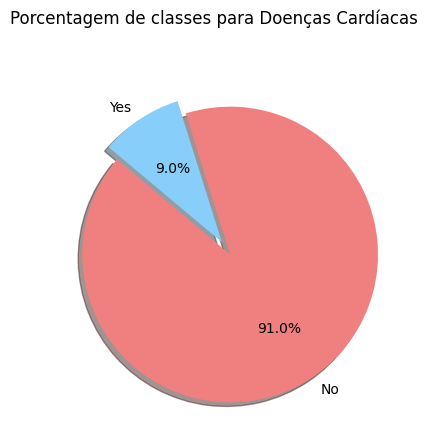

In [ ]:
# HeartDisease
labels = dataset['HeartDisease'].unique()
sizes = dataset.groupby('HeartDisease').size()
colors = ['lightcoral',
'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode,
labels=labels,
colors=colors,autopct='%1.1f%%',
shadow=True, startangle=140)

plt.suptitle("Porcentagem de classes para Doenças Cardíacas")

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dataset[dataset["HeartDisease"]=='Yes']["BMI"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(dataset[dataset["HeartDisease"]=='No']["BMI"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribuição do IMC', fontsize = 18)
ax.set_xlabel("IMC")
ax.set_ylabel("Frequência")
ax.legend();
plt.show()

NameError: ignored

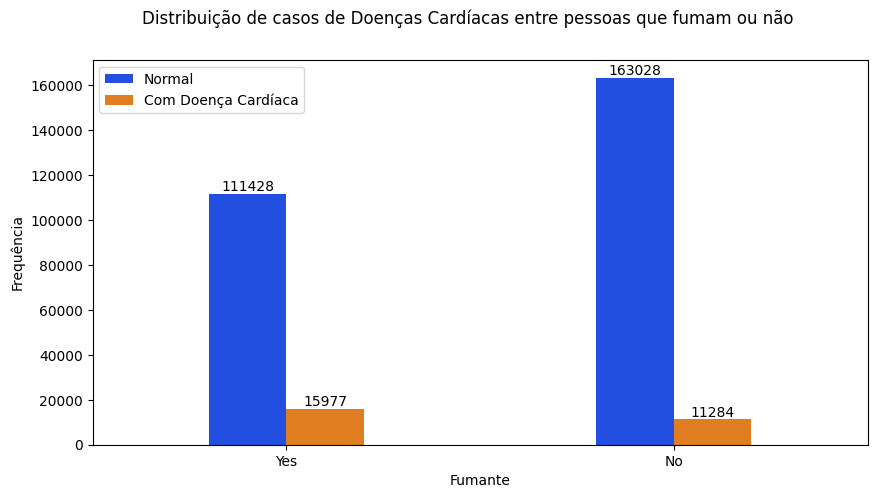

In [ ]:
# Smoking
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['Smoking'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de Doenças Cardíacas entre pessoas que fumam ou não")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Fumante')
plt.legend(['Normal', 'Com Doença Cardíaca'])
plt.ylabel('Frequência')
plt.show()

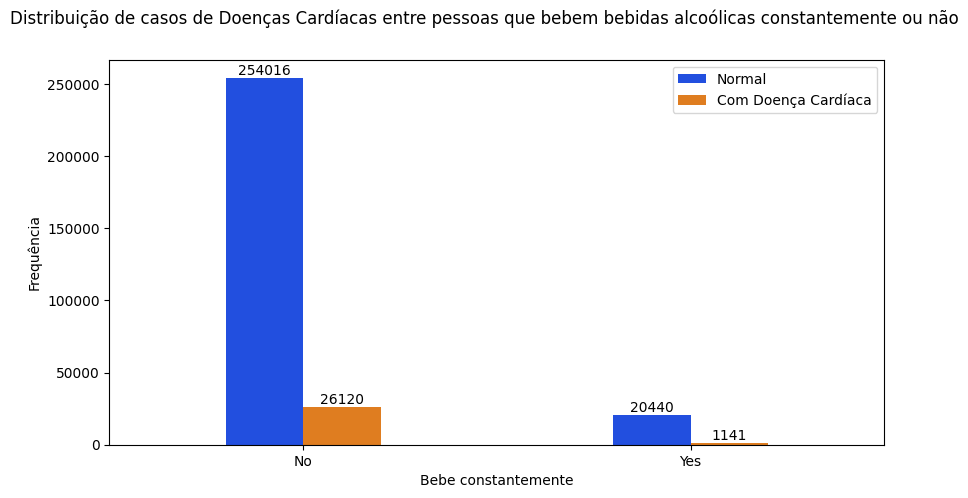

In [ ]:
# AlcoholDrinking
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['AlcoholDrinking'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de Doenças Cardíacas entre pessoas que bebem bebidas alcoólicas constantemente ou não")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Bebe constantemente')
plt.legend(['Normal', 'Com Doença Cardíaca'])
plt.ylabel('Frequência')
plt.show()

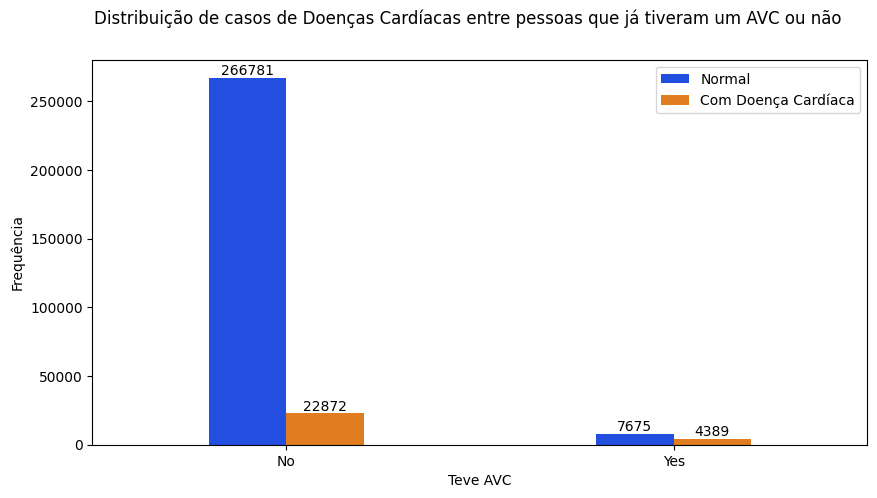

In [ ]:
# Stroke
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['Stroke'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de Doenças Cardíacas entre pessoas que já tiveram um AVC ou não")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Teve AVC')
plt.legend(['Normal', 'Com Doença Cardíaca'])
plt.ylabel('Frequência')
plt.show()

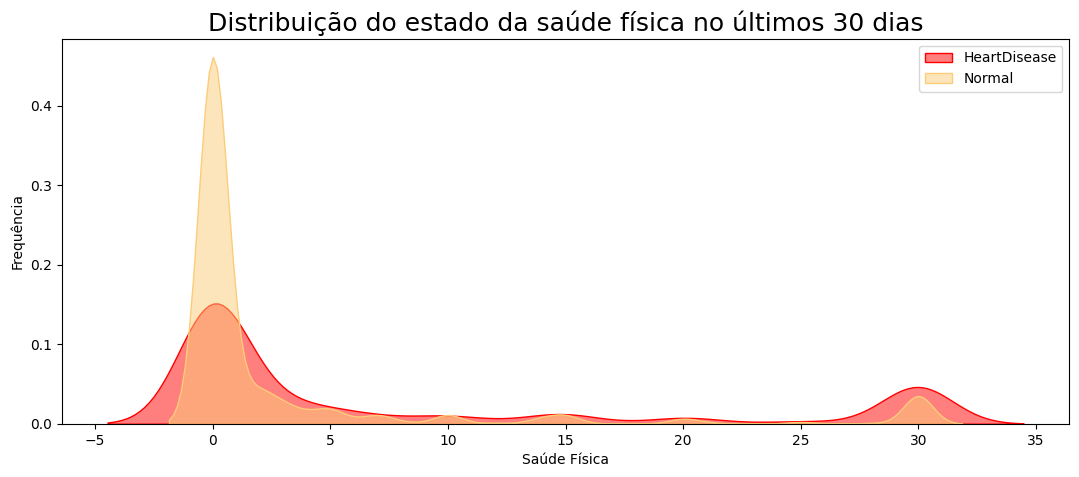

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dataset[dataset["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(dataset[dataset["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribuição do estado da saúde física no últimos 30 dias', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("Saúde Física")
ax.set_ylabel("Frequência")
ax.legend();
plt.show()

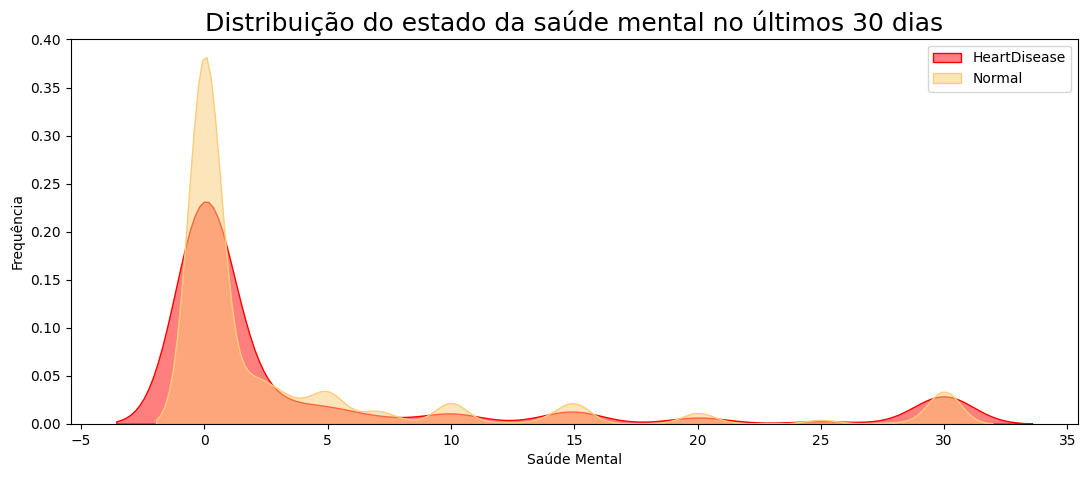

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dataset[dataset["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(dataset[dataset["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribuição do estado da saúde mental no últimos 30 dias', fontsize = 18)
ax.set_xlabel("Saúde Mental")
ax.set_ylabel("Frequência")
ax.legend();
plt.show()

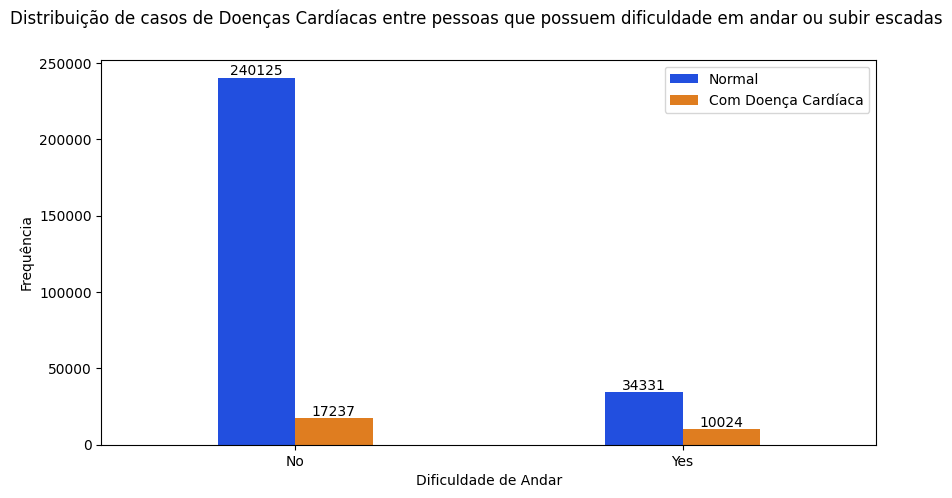

In [ ]:
# DiffWalking

plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['DiffWalking'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de Doenças Cardíacas entre pessoas que possuem dificuldade em andar ou subir escadas")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Dificuldade de Andar')
plt.legend(['Normal', 'Com Doença Cardíaca'])
plt.ylabel('Frequência')
plt.show()

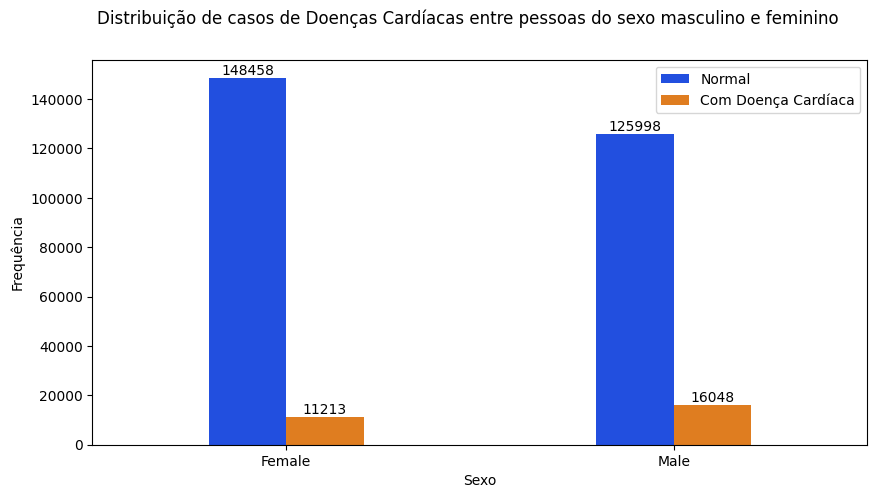

In [ ]:
# Sex

plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['Sex'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de Doenças Cardíacas entre pessoas do sexo masculino e feminino")


for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Sexo')
plt.legend(['Normal', 'Com Doença Cardíaca'])
plt.ylabel('Frequência')
plt.show()

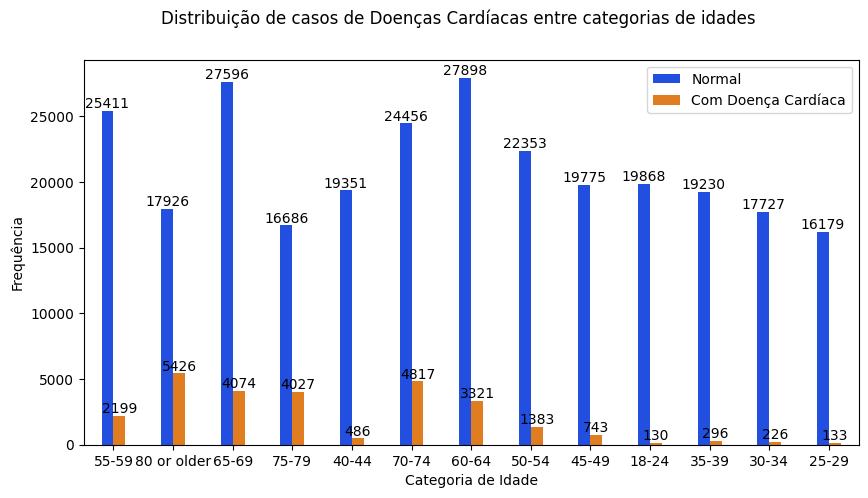

In [ ]:
# AgeCategory
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['AgeCategory'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de Doenças Cardíacas entre categorias de idades")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Categoria de Idade')
plt.legend(['Normal', 'Com Doença Cardíaca'])
plt.ylabel('Frequência')
plt.show()

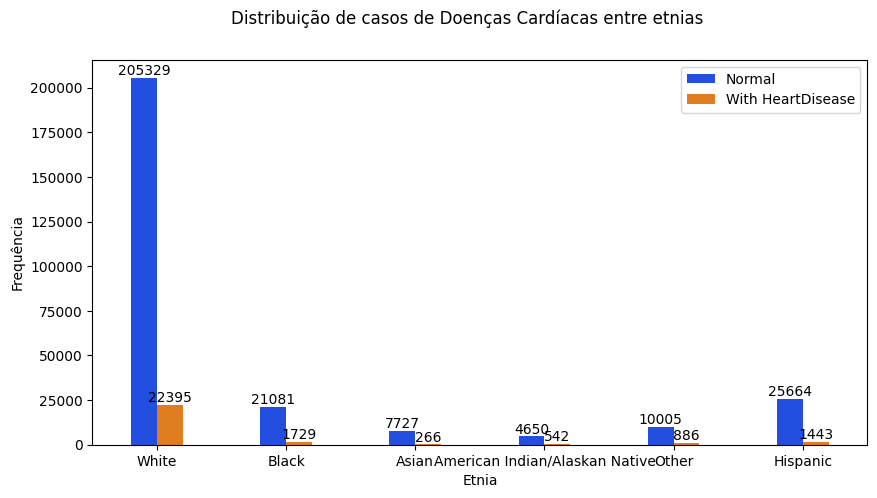

In [ ]:
# Race

plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['Race'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de Doenças Cardíacas entre etnias")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Etnia')
plt.legend(['Normal', 'With HeartDisease'])
plt.ylabel('Frequência')
plt.show()

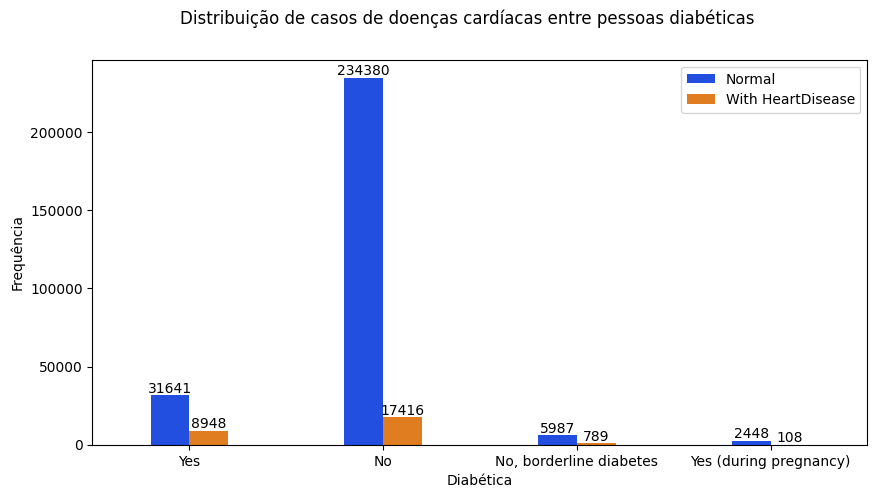

In [ ]:
# Diabetic
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['Diabetic'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de doenças cardíacas entre pessoas diabéticas")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Diabética')
plt.legend(['Normal', 'With HeartDisease'])
plt.ylabel('Frequência')
plt.show()

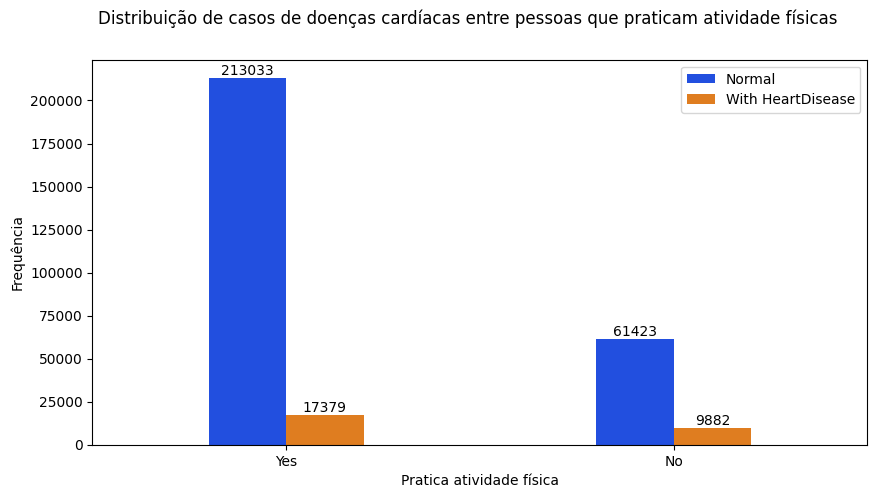

In [ ]:
# PhysicalActivity
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['PhysicalActivity'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de doenças cardíacas entre pessoas que praticam atividade físicas")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Pratica atividade física')
plt.legend(['Normal', 'With HeartDisease'])
plt.ylabel('Frequência')
plt.show()

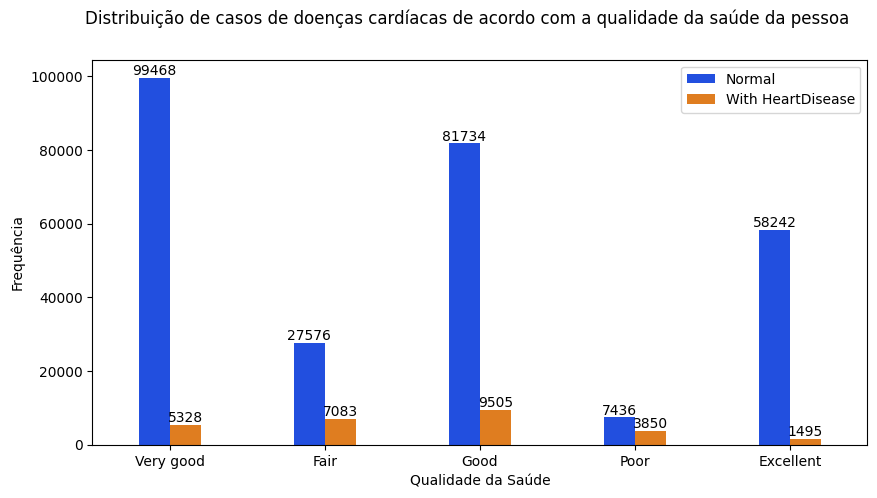

In [ ]:
# GenHealth
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['GenHealth'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de doenças cardíacas de acordo com a qualidade da saúde da pessoa")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Qualidade da Saúde')
plt.legend(['Normal', 'With HeartDisease'])
plt.ylabel('Frequência')
plt.show()

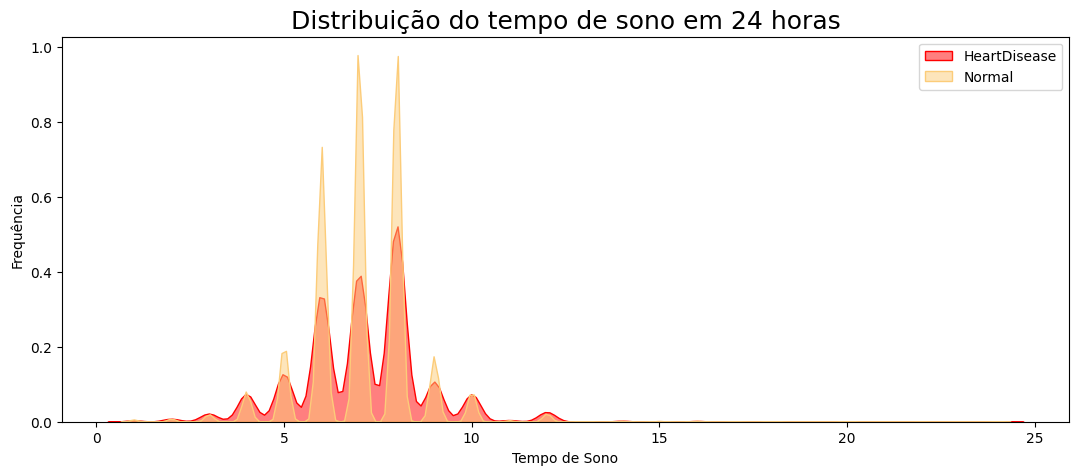

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dataset[dataset["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(dataset[dataset["HeartDisease"]=='No']["SleepTime"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribuição do tempo de sono em 24 horas', fontsize = 18)
ax.set_xlabel("Tempo de Sono")
ax.set_ylabel("Frequência")
ax.legend();
plt.show()


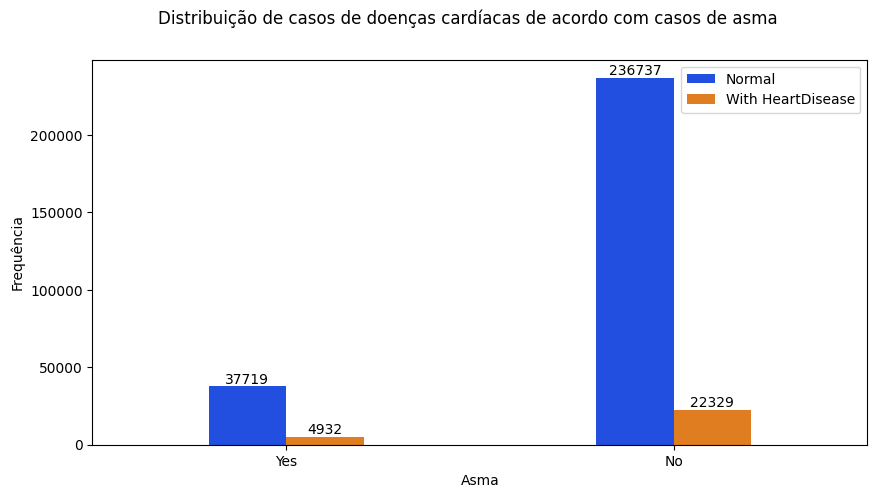

In [ ]:
# Asthma
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['Asthma'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de doenças cardíacas de acordo com casos de asma")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Asma')
plt.legend(['Normal', 'With HeartDisease'])
plt.ylabel('Frequência')
plt.show()

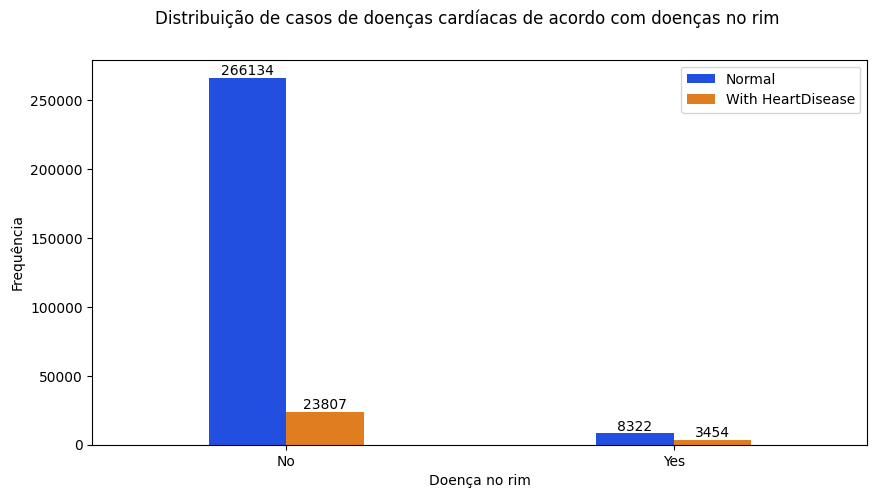

In [ ]:
# Rim
plt.figure(figsize = (10,5))
ax = sns.countplot( x= dataset['KidneyDisease'], hue = 'HeartDisease', data = dataset, palette = 'bright', width = 0.4)

plt.suptitle("Distribuição de casos de doenças cardíacas de acordo com doenças no rim")

for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Doença no rim')
plt.legend(['Normal', 'With HeartDisease'])
plt.ylabel('Frequência')
plt.show()

#Preparação dos dados para utilização dos algoritmos


Em uma primeira abordagem, pensamos na transformação dos dados que constituem o dataset de maneira manual, trocando apenas os valores dos tipos strings por números que catagorizavam os atributos de acordo a porcentagem dos atributos.

In [ ]:
dataset_abordagem1 = dataset


# Aqui trataremos os dados

a = 1.0 # Caso queira float

# Aqui tem que tomar cuidado pq a gente acaba criando uma ordem

'''
Ao setarmos os valores manualmente, em ordem decrescente do que possui mais porcentagem para o que possui menos,
criamos uma relação ordinal, em que a ordem que definimos nossos valores influencia na correlação e na covariancia dos atributos.

'''

dataset_abordagem1 =  dataset_abordagem1[dataset_abordagem1.columns].replace({'Yes':1 * a, 'No':0 * a, 'Male':1 * a,'Female':0 * a,'No, borderline diabetes':0 * a,'Yes (during pregnancy)':1 * a })

dataset_abordagem1['Race'] = dataset_abordagem1['Race'].map(
                   {'White':5 * a ,'Hispanic':0 * a ,'Black':4 * a ,'Asian':3 * a ,'Other': 1 * a,'American Indian/Alaskan Native': 2 * a}) # Colocamos em ordem de proporção

dataset_abordagem1['GenHealth'] = dataset_abordagem1['GenHealth'].map(
                   {'Poor':0 * a ,'Fair':1 * a ,'Good':2 * a ,'Very good':3 * a ,'Excellent': 4 * a})

dataset_abordagem1['AgeCategory'] = dataset_abordagem1['AgeCategory'].map(
                   {'18-24':0 * a ,'25-29':1 * a ,'30-34':2 * a ,'35-39':3 * a ,'40-44': 4 * a,
                    '45-49':5 * a ,'50-54':6 * a ,'55-59':7 * a ,'60-64':8 * a ,'65-69': 9 * a,
                    '70-74':10 * a ,'75-79':11 * a ,'80-84':12 * a ,'80 or older':13 * a})

x = dataset_abordagem1.iloc[:,0:4]
y = dataset_abordagem1.iloc[:,4]


In [ ]:
dataset_abordagem1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,1.0,1.0,3.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,3.0,8.0,0.0,0.0,0.0


Por fim, uma segunda abordagem para nossos dados foi utilizandos as ferramentas OneHotEncoder.

In [ ]:

dataset_abordagem2 = dataset
dataset_abordagem2 =  dataset_abordagem2[dataset_abordagem2.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
dataset_abordagem2['Diabetic'] = dataset_abordagem2['Diabetic'].astype(int)

#One Hot Encoder
dataset_abordagem2 = dataset_abordagem2.dropna()

transformer = make_column_transformer(
    (OneHotEncoder(), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

transformed = transformer.fit_transform(dataset_abordagem2)
dataset_abordagem2 = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

dataset_abordagem2.describe()

#Select Features
features = dataset_abordagem2.drop(columns =['remainder__HeartDisease'], axis = 1)

#Select Target
target = dataset_abordagem2['remainder__HeartDisease']


# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train_abordagem2, X_test_abordagem2, y_train_abordagem2, y_test_abordagem2 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train_abordagem2.shape)
print('Shape of testing feature:', X_test_abordagem2.shape)
print('Shape of training label:', y_train_abordagem2.shape)
print('Shape of training label:', y_test_abordagem2.shape)

x2 = dataset_abordagem2.iloc[:,0:4]
y2 = dataset_abordagem2.iloc[:,4]

Shape of training feature: (255836, 38)
Shape of testing feature: (63959, 38)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [ ]:
dataset_abordagem2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 39 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   onehotencoder__AgeCategory_18-24                    319795 non-null  float64
 1   onehotencoder__AgeCategory_25-29                    319795 non-null  float64
 2   onehotencoder__AgeCategory_30-34                    319795 non-null  float64
 3   onehotencoder__AgeCategory_35-39                    319795 non-null  float64
 4   onehotencoder__AgeCategory_40-44                    319795 non-null  float64
 5   onehotencoder__AgeCategory_45-49                    319795 non-null  float64
 6   onehotencoder__AgeCategory_50-54                    319795 non-null  float64
 7   onehotencoder__AgeCategory_55-59                    319795 non-null  float64
 8   onehotencoder__AgeCategory_60-64                    319795 non-n

#Aplicando os algoritmos de aprendizado de máquina

In [ ]:
def evaluate_model(model, x_test, y_test):

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calcular o quão bom é nosso modelo
    acc = metrics.accuracy_score(y_test, y_pred) # Acuracia
    prec = metrics.precision_score(y_test, y_pred) # Precisao
    rec = metrics.recall_score(y_test, y_pred) # Recall
    f1 = metrics.f1_score(y_test, y_pred) # f1- score
    kappa = metrics.cohen_kappa_score(y_test, y_pred) # kappa

    # Mostrar a matriz de confusao
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
             'cm': cm}

##Abordagem 1

<ipython-input-11-39affccc5cd6>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.235841,0.039285,0.174782,-0.100030,-0.243182,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.011374,-0.030883,0.200443,-0.150616,-0.230720,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.124994,0.061821,0.055544,-0.097174,-0.174717,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.060769,0.021080,-0.057786,0.017487,0.029780,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.139362,0.016025,0.104467,-0.079455,-0.168090,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.109882,-0.002861,0.153975,-0.232283,-0.482697,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155421,-0.026097,0.029709,-0.095808,-0.241625,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.246336,-0.001444,0.209255,-0.278524,-0.413797,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.068679,0.003377,-0.002054,0.048247,0.025947,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.235841,-0.011374,0.124994,-0.060769,0.139362,0.109882,-0.155421,0.246336,-0.068679,1.000000,0.200349,0.193434,-0.124230,-0.188637,0.107756,-0.058628,0.123903,0.266299


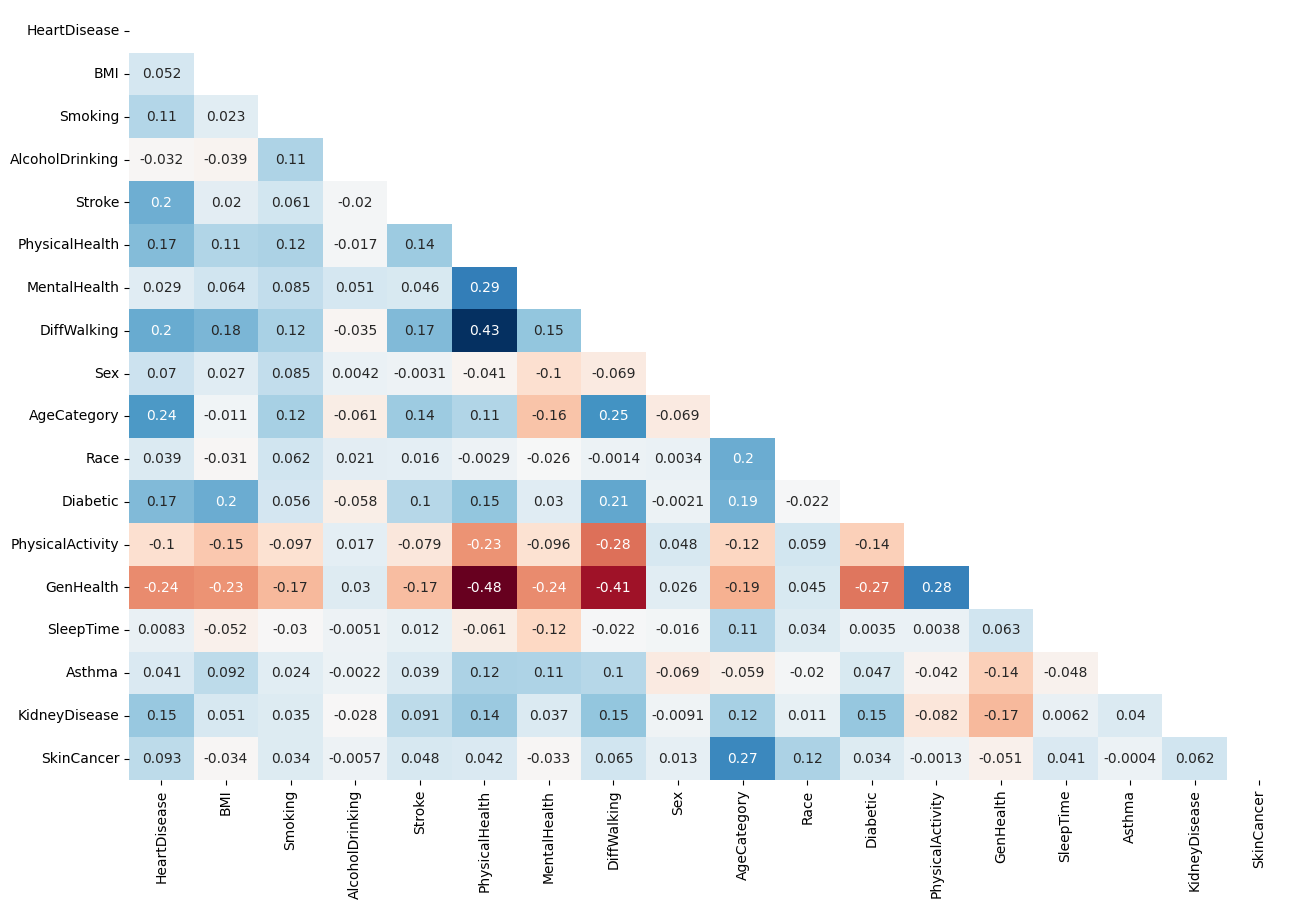

In [ ]:
plt.figure(figsize= (15,10))
mask = np.triu(np.ones_like(dataset_abordagem1.corr(), dtype=np.bool))
sns.heatmap(dataset_abordagem1.corr(), mask = mask, annot = True, cbar = False,cmap = 'RdBu')
dataset_abordagem1.corr()

In [ ]:
#Select Features

features = dataset_abordagem1.drop(columns =['HeartDisease'], axis = 1)

#Select Target
target = dataset_abordagem1['HeartDisease']


# Dividindo o conjunto em 80% Treino e 20% Teste.
# O parâmetro random_state = 44 define que sempre será dividido da mesma forma o conjunto.

X_train_abordagem1, X_test_abordagem1, y_train_abordagem1, y_test_abordagem1 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

print('Tamanho do conjunto de Treino: {}'.format(X_train_abordagem1.shape))
print('Tamanho do conjunto de Teste: {}'.format(X_test_abordagem1.shape))

Tamanho do conjunto de Treino: (255836, 17)
Tamanho do conjunto de Teste: (63959, 17)


Testando os conjuntos de teste - Decision Tree

Tempo de execução: 1.8483269214630127
Acuracia: 0.8658359261401836
Precisão: 0.23328228688106176
Recall (Sensibilidade): 0.2517443995593096
Especificidade:  0.9752428762324389


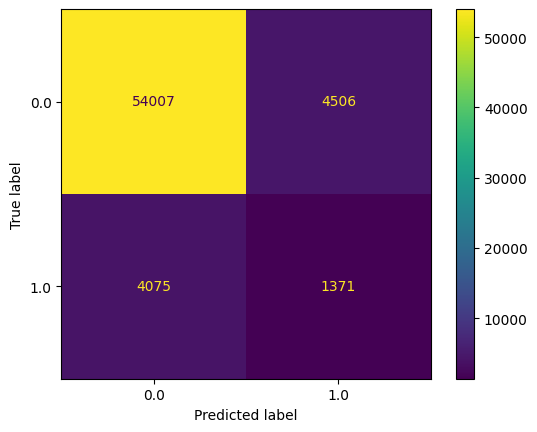

In [ ]:
t = time.time()
# Building Decision Tree model
clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train_abordagem1, y_train_abordagem1)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test_abordagem1, y_test_abordagem1)

print('Tempo de execução: {}'.format(time.time() - t))

# Print result
print('Acuracia:', clf_eval['acc'])
print('Precisão:', clf_eval['prec'])
print('Recall (Sensibilidade):', clf_eval['rec'])
cm = ConfusionMatrixDisplay.from_estimator(clf, X_test_abordagem1, y_test_abordagem1, values_format='.0f')
tn,fp,fn,tp = clf_eval['cm'].ravel()
print('Especificidade: ', tn/ (tn+tp))

Testando os conjuntos de teste - Cross-Validation com KNN

In [ ]:
# Teste com cross validation e KNN
t = time.time()
KNN = KNeighborsClassifier(n_neighbors=3)

#scores = cross_val_score(KNN, x, y, cv=100)
pred = cross_val_predict(KNN, x, y, cv=100)
print('Tempo de execução: {}'.format(time.time() - t))

Tempo de execução: 72.92527794837952


Acuracia: 0.951750340061602
Precisão: 0.09729211598370477
Recall (Sensibilidade): 0.0336399038859889
Especificidade:  0.9986660752714668


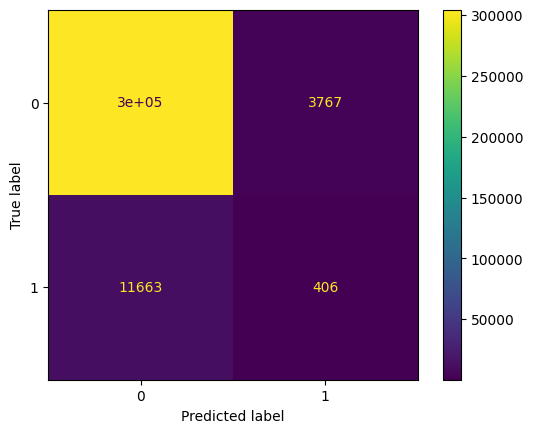

In [ ]:
acc = metrics.accuracy_score(y, pred) # Acuracia
prec = metrics.precision_score(y, pred) # Precisao
rec = metrics.recall_score(y, pred) # Recall
f1 = metrics.f1_score(y, pred) # f1- score
kappa = metrics.cohen_kappa_score(y, pred) # kappa

print('Acuracia:', acc)
print('Precisão:', prec)
print('Recall (Sensibilidade):',rec)
tn,fp,fn,tp = confusion_matrix(y, pred).ravel()
print('Especificidade: ', tn/ (tn+tp))
cm = ConfusionMatrixDisplay(confusion_matrix(y, pred))
cm.plot()
plt.show()

Testando os conjuntos de teste - Cross-Validation com Random Forest

In [ ]:
t = time.time()

rf = RandomForestClassifier()

kfold = KFold(n_splits=5, shuffle=True)

pred2 = cross_val_predict(rf, x, y, cv=kfold)
print('Tempo de execução: {}'.format(time.time() - t))

Tempo de execução: 225.18313670158386


Acuracia: 0.9602307728388498
Precisão: 0.17775571002979146
Recall (Sensibilidade): 0.01483138619603944
Especificidade:  0.9994170843143576


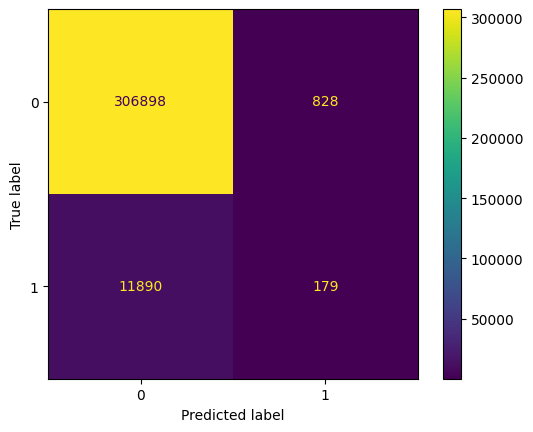

In [ ]:
acc = metrics.accuracy_score(y, pred2) # Acuracia
prec = metrics.precision_score(y, pred2) # Precisao
rec = metrics.recall_score(y, pred2) # Recall
f1 = metrics.f1_score(y, pred2) # f1- score
kappa = metrics.cohen_kappa_score(y, pred2) # kappa

print('Acuracia:', acc)
print('Precisão:', prec)
print('Recall (Sensibilidade):',rec)
tn,fp,fn,tp = confusion_matrix(y, pred2).ravel()
print('Especificidade: ', tn/ (tn+tp))
cm = ConfusionMatrixDisplay(confusion_matrix(y, pred2))
cm.plot()
plt.show()

## Abordagem 2

<ipython-input-170-4aa6576d970c>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,onehotencoder__AgeCategory_18-24,onehotencoder__AgeCategory_25-29,onehotencoder__AgeCategory_30-34,onehotencoder__AgeCategory_35-39,onehotencoder__AgeCategory_40-44,onehotencoder__AgeCategory_45-49,onehotencoder__AgeCategory_50-54,onehotencoder__AgeCategory_55-59,onehotencoder__AgeCategory_60-64,onehotencoder__AgeCategory_65-69,...,remainder__PhysicalHealth,remainder__MentalHealth,remainder__DiffWalking,remainder__Sex,remainder__Diabetic,remainder__PhysicalActivity,remainder__SleepTime,remainder__Asthma,remainder__KidneyDisease,remainder__SkinCancer
onehotencoder__AgeCategory_18-24,1.000000,-0.063703,-0.067011,-0.070078,-0.070673,-0.071964,-0.077837,-0.084542,-0.090526,-0.091254,...,-0.058432,0.076110,-0.098279,0.038299,-0.096279,0.054763,0.015882,0.033739,-0.044586,-0.084450
onehotencoder__AgeCategory_25-29,-0.063703,1.000000,-0.060131,-0.062883,-0.063417,-0.064576,-0.069846,-0.075862,-0.081232,-0.081886,...,-0.049974,0.053483,-0.084258,0.025117,-0.081089,0.043190,-0.018123,0.023155,-0.039453,-0.074295
onehotencoder__AgeCategory_30-34,-0.067011,-0.060131,1.000000,-0.066149,-0.066710,-0.067929,-0.073473,-0.079801,-0.085451,-0.086138,...,-0.045203,0.042949,-0.081228,0.017716,-0.071624,0.041523,-0.039297,0.011961,-0.038788,-0.074948
onehotencoder__AgeCategory_35-39,-0.070078,-0.062883,-0.066149,1.000000,-0.069764,-0.071038,-0.076835,-0.083454,-0.089362,-0.090080,...,-0.039150,0.038111,-0.072606,0.006459,-0.061382,0.033232,-0.044617,0.003916,-0.035157,-0.074278
onehotencoder__AgeCategory_40-44,-0.070673,-0.063417,-0.066710,-0.069764,1.000000,-0.071641,-0.077488,-0.084163,-0.090121,-0.090845,...,-0.027567,0.026483,-0.060226,0.000368,-0.045197,0.024086,-0.040364,0.009345,-0.028203,-0.068274
onehotencoder__AgeCategory_45-49,-0.071964,-0.064576,-0.067929,-0.071038,-0.071641,1.000000,-0.078903,-0.085700,-0.091767,-0.092505,...,-0.012457,0.017139,-0.041532,-0.001395,-0.025574,0.011703,-0.036092,0.007602,-0.023924,-0.054448
onehotencoder__AgeCategory_50-54,-0.077837,-0.069846,-0.073473,-0.076835,-0.077488,-0.078903,1.000000,-0.092694,-0.099256,-0.100054,...,0.010158,0.017790,-0.013431,-0.002532,-0.003524,0.000384,-0.036104,0.003486,-0.014492,-0.042707
onehotencoder__AgeCategory_55-59,-0.084542,-0.075862,-0.079801,-0.083454,-0.084163,-0.085700,-0.092694,1.000000,-0.107806,-0.108672,...,0.029677,0.009293,0.019013,0.000899,0.021120,-0.005619,-0.030470,0.000251,-0.004913,-0.020483
onehotencoder__AgeCategory_60-64,-0.090526,-0.081232,-0.085451,-0.089362,-0.090121,-0.091767,-0.099256,-0.107806,1.000000,-0.116366,...,0.045294,-0.012363,0.042416,0.002060,0.042380,-0.016643,-0.009723,0.001949,0.008658,0.009369
onehotencoder__AgeCategory_65-69,-0.091254,-0.081886,-0.086138,-0.090080,-0.090845,-0.092505,-0.100054,-0.108672,-0.116366,1.000000,...,0.024616,-0.042552,0.041622,-0.001124,0.065311,-0.012093,0.023902,-0.011689,0.025335,0.051956


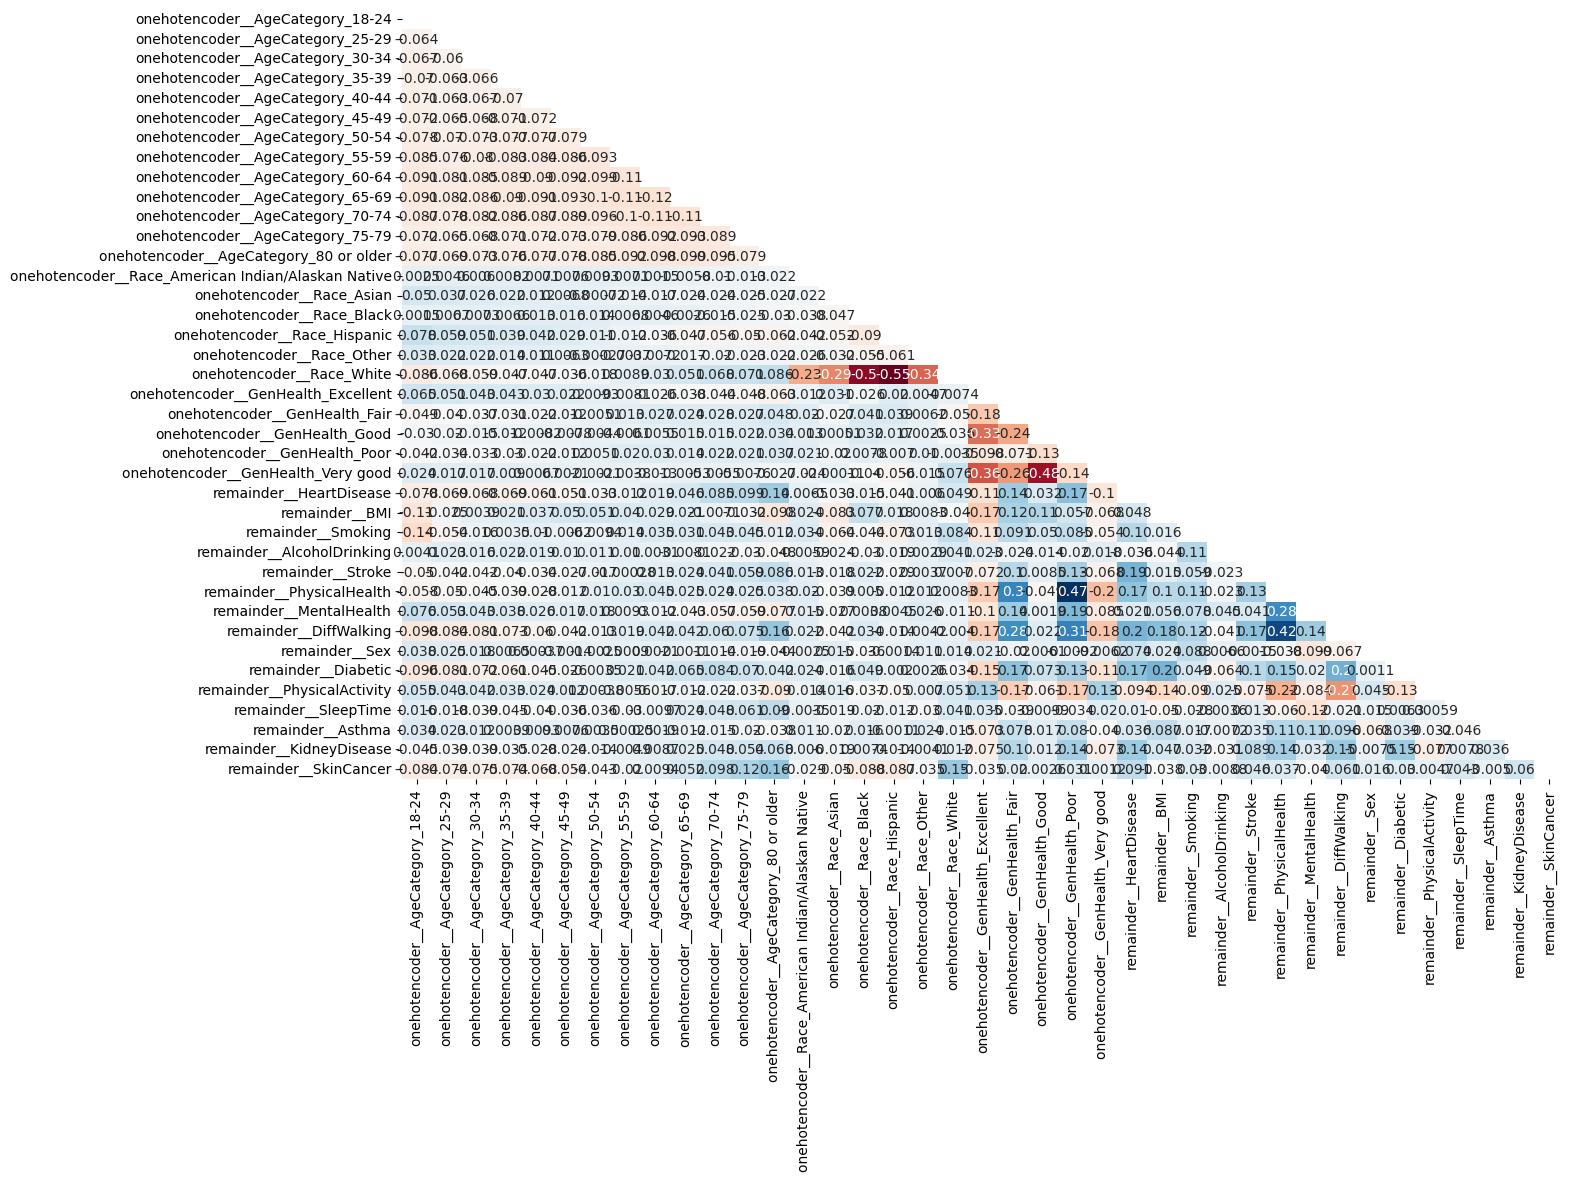

In [ ]:
plt.figure(figsize= (15,10))
mask = np.triu(np.ones_like(dataset_abordagem2.corr(), dtype=np.bool))
sns.heatmap(dataset_abordagem2.corr(), mask = mask, annot = True, cbar = False,cmap = 'RdBu')
dataset_abordagem2.corr()

Testando os conjuntos de teste - Decision Tree

Tempo de execução: 2.8007307052612305
Acuracia: 0.8554776235719379
Precisão: 0.22224074691563855
Recall (Sensibilidade): 0.24758543833580982
Especificidade:  0.9741631616692187


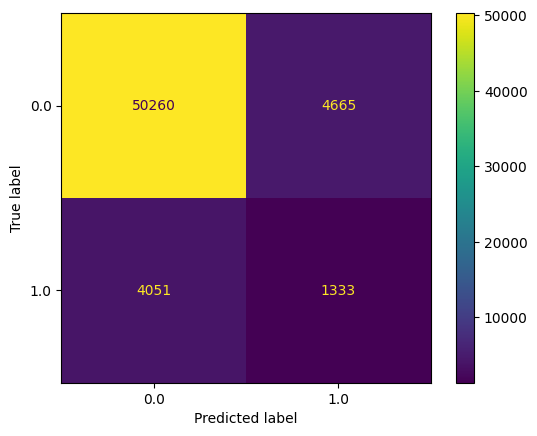

In [ ]:
t = time.time()

# Building Decision Tree model
clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train_abordagem2, y_train_abordagem2)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test_abordagem2, y_test_abordagem2)

# Print result
print('Tempo de execução: {}'.format(time.time() - t))
print('Acuracia:', clf_eval['acc'])
print('Precisão:', clf_eval['prec'])
print('Recall (Sensibilidade):', clf_eval['rec'])
cm = ConfusionMatrixDisplay.from_estimator(clf, X_test_abordagem2, y_test_abordagem2, values_format='.0f')
tn,fp,fn,tp = clf_eval['cm'].ravel()
print('Especificidade: ', tn/ (tn+tp))

Testando os conjuntos de teste - Cross-Validation com KNN

In [ ]:
# Teste com cross validation e KNN
t = time.time()
KNN = KNeighborsClassifier(n_neighbors=3)

pred3 = cross_val_predict(KNN, features, target, cv=100)
print('Tempo de execução: {}'.format(time.time() - t))

Tempo de execução: 635.0365409851074


Acuracia: 0.8932096145172844
Precisão: 0.276300369602452
Recall (Sensibilidade): 0.11252248614119462
Especificidade:  0.9886204156796935


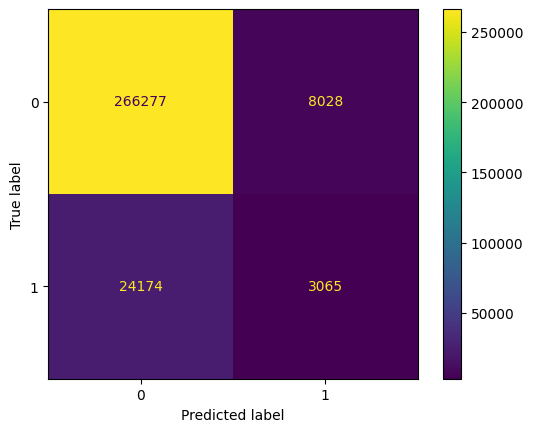

In [ ]:
acc = metrics.accuracy_score(target, pred3) # Acuracia
prec = metrics.precision_score(target, pred3) # Precisao
rec = metrics.recall_score(target, pred3) # Recall
f1 = metrics.f1_score(target, pred3) # f1- score
kappa = metrics.cohen_kappa_score(target, pred3) # kappa

print('Acuracia:', acc)
print('Precisão:', prec)
print('Recall (Sensibilidade):',rec)
tn,fp,fn,tp = confusion_matrix(target, pred3).ravel()
print('Especificidade: ', tn/ (tn+tp))
cm = ConfusionMatrixDisplay(confusion_matrix(target, pred3))
cm.plot()
plt.show()

Testando os conjuntos de teste - Cross-Validation com Random Forest

In [ ]:
t = time.time()

rf = RandomForestClassifier()

kfold = KFold(n_splits=5, shuffle=True)

pred4 = cross_val_predict(rf, features, target, cv=kfold)
print('Tempo de execução: {}'.format(time.time() - t))

Tempo de execução: 218.61994791030884


Acuracia: 0.8969702597299233
Precisão: 0.31334698254850346
Recall (sensibilidade): 0.11799258416241419
Especificidade:  0.9881172451529896


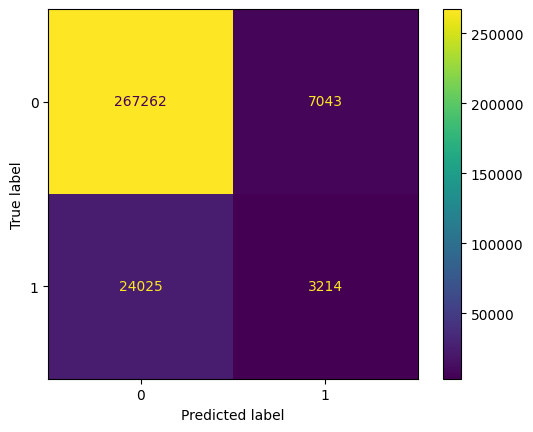

In [ ]:
acc = metrics.accuracy_score(target, pred4) # Acuracia
prec = metrics.precision_score(target, pred4) # Precisao
rec = metrics.recall_score(target, pred4) # Recall
f1 = metrics.f1_score(target, pred4) # f1- score
kappa = metrics.cohen_kappa_score(target, pred4) # kappa

print('Acuracia:', acc)
print('Precisão:', prec)
print('Recall (sensibilidade):',rec)
tn,fp,fn,tp = confusion_matrix(target, pred4).ravel()
print('Especificidade: ', tn/ (tn+tp))
cm = ConfusionMatrixDisplay(confusion_matrix(target, pred4))
cm.plot()
plt.show()

## Abordagem 3

In [ ]:
dataset_abordagem3 = dataset

In [ ]:
label=LabelEncoder()
for col in dataset:
    dataset_abordagem3[col]=label.fit_transform(dataset_abordagem3[col])

xL = dataset_abordagem3.drop('HeartDisease', axis=1)
yL = dataset_abordagem3[['HeartDisease']]

<ipython-input-183-68762ef03975>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.049450,0.104554,-0.036449,0.194535,0.165342,0.020721,0.196468,0.074457,0.239342,0.042832,0.163669,-0.093601,-0.012203,0.010170,0.035704,0.142744,0.090649
BMI,0.049450,1.000000,0.017159,-0.044905,0.016275,0.099171,0.051997,0.172571,0.031963,0.000136,-0.028160,0.202155,-0.143215,0.034088,-0.049814,0.085468,0.047486,-0.036791
Smoking,0.104554,0.017159,1.000000,0.109014,0.058965,0.110322,0.078216,0.115755,0.087501,0.128360,0.075765,0.047049,-0.089895,0.013991,-0.027889,0.017495,0.032016,0.030477
AlcoholDrinking,-0.036449,-0.044905,0.109014,1.000000,-0.022892,-0.023455,0.045188,-0.041219,0.006643,-0.060668,0.043206,-0.063486,0.024511,0.001883,-0.003578,-0.007202,-0.031242,-0.008814
Stroke,0.194535,0.016275,0.058965,-0.022892,1.000000,0.132705,0.041124,0.170575,-0.001476,0.141715,0.001353,0.097781,-0.074802,-0.009776,0.013091,0.034809,0.089159,0.045893
PhysicalHealth,0.165342,0.099171,0.110322,-0.023455,0.132705,1.000000,0.279252,0.422628,-0.038407,0.114801,0.010314,0.143237,-0.223822,-0.037779,-0.060135,0.109919,0.138198,0.036796
MentalHealth,0.020721,0.051997,0.078216,0.045188,0.041124,0.279252,1.000000,0.142410,-0.098960,-0.158594,-0.002314,0.022411,-0.083931,-0.005325,-0.119803,0.105203,0.032136,-0.040185
DiffWalking,0.196468,0.172571,0.115755,-0.041219,0.170575,0.422628,0.142410,1.000000,-0.067336,0.250690,-0.005391,0.198656,-0.271505,-0.046017,-0.020716,0.095631,0.149401,0.060751
Sex,0.074457,0.031963,0.087501,0.006643,-0.001476,-0.038407,-0.098960,-0.067336,1.000000,-0.060573,0.015552,-0.010496,0.045303,-0.011734,-0.015420,-0.067908,-0.007527,0.015834
AgeCategory,0.239342,0.000136,0.128360,-0.060668,0.141715,0.114801,-0.158594,0.250690,-0.060573,1.000000,0.165003,0.199113,-0.125431,0.036805,0.106418,-0.058775,0.126575,0.267959


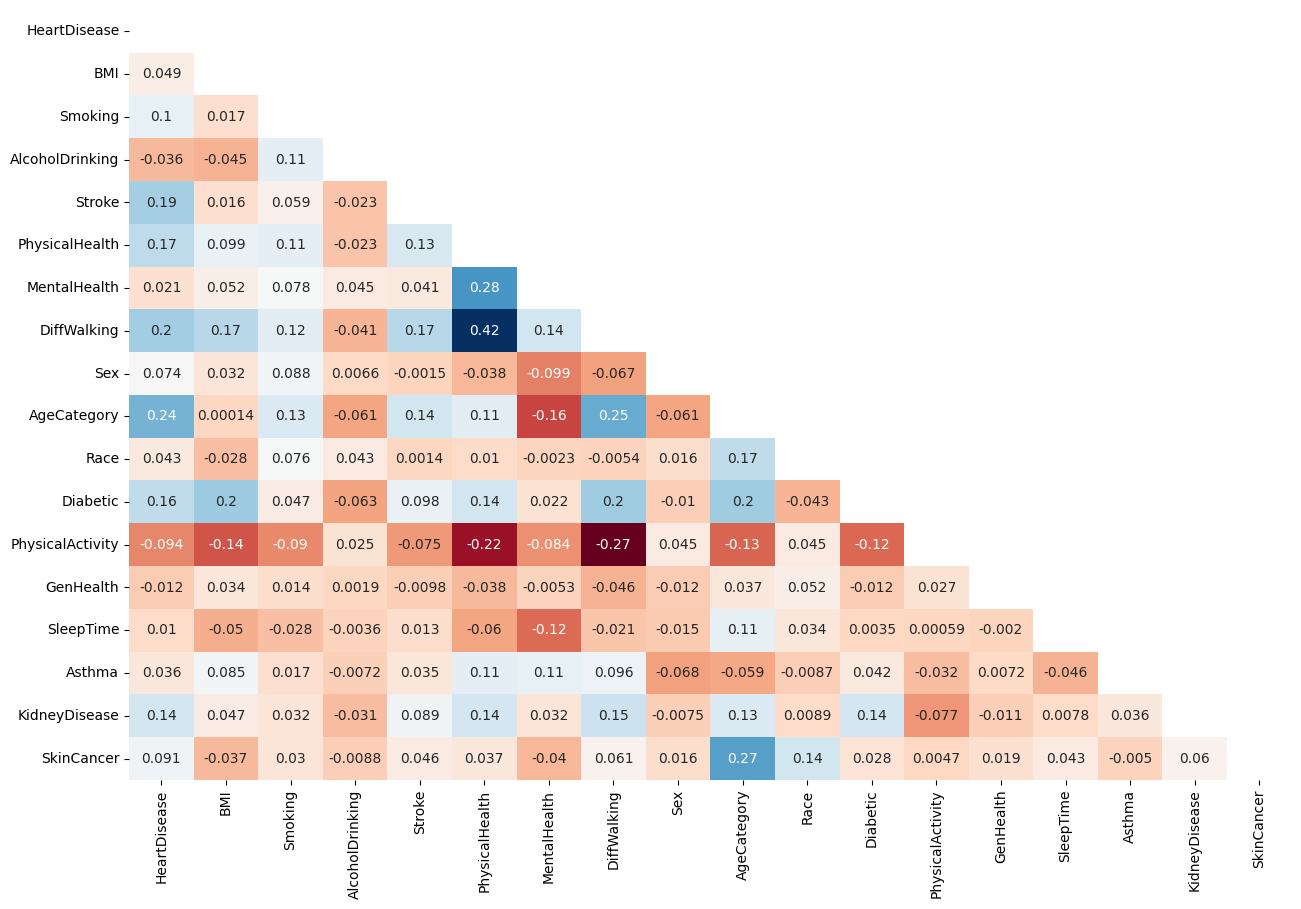

In [ ]:
plt.figure(figsize= (15,10))
mask = np.triu(np.ones_like(dataset_abordagem3.corr(), dtype=np.bool))
sns.heatmap(dataset_abordagem3.corr(), mask = mask, annot = True, cbar = False,cmap = 'RdBu')
dataset_abordagem3.corr()

Testando os conjuntos de teste - Decision Tree

In [ ]:
#Select Features
features = dataset_abordagem3.drop(columns =['HeartDisease'], axis = 1)

#Select Target
target = dataset_abordagem3['HeartDisease']


# Dividindo o conjunto em 80% Treino e 20% Teste.
# O parâmetro random_state = 44 define que sempre será dividido da mesma forma o conjunto.

X_train_abordagem3, X_test_abordagem3, y_train_abordagem3, y_test_abordagem3 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

print('Tamanho do conjunto de Treino: {}'.format(X_train_abordagem3.shape))
print('Tamanho do conjunto de Teste: {}'.format(X_test_abordagem3.shape))

Tamanho do conjunto de Treino: (241235, 17)
Tamanho do conjunto de Teste: (60309, 17)


Tempo de execução: 1.6457059383392334
Acuracia: 0.8557429239417003
Precisão: 0.2273923051627754
Recall (Sensibilidade): 0.2568722139673105
Especificidade:  0.9732023484275998


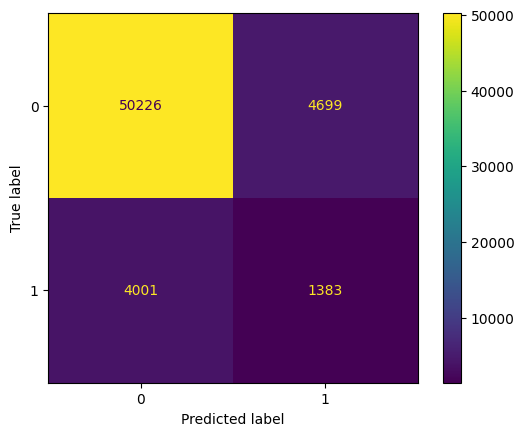

In [ ]:
t = time.time()
# Building Decision Tree model
clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train_abordagem3, y_train_abordagem3)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test_abordagem3, y_test_abordagem3)

# Print result
print('Tempo de execução: {}'.format(time.time() - t))
print('Acuracia:', clf_eval['acc'])
print('Precisão:', clf_eval['prec'])
print('Recall (Sensibilidade):', clf_eval['rec'])
cm = ConfusionMatrixDisplay.from_estimator(clf, X_test_abordagem3, y_test_abordagem3, values_format='.0f')
tn,fp,fn,tp = clf_eval['cm'].ravel()
print('Especificidade: ', tn/ (tn+tp))

Testando os conjuntos de teste - Cross-Validation com KNN

In [ ]:
# Teste com cross validation e KNN
t = time.time()
KNN = KNeighborsClassifier(n_neighbors=3)

#scores = cross_val_score(KNN, xL, yL, cv=100)
pred5 = cross_val_predict(KNN, xL, yL, cv=10)
print('Tempo de execução: {}'.format(time.time() - t))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/skle

Tempo de execução: 1588.3939759731293


Acuracia: 0.8919792799724087
Precisão: 0.25107336195631885
Recall (Sensibilidade): 0.09875546092000441
Especificidade:  0.9899989218168501


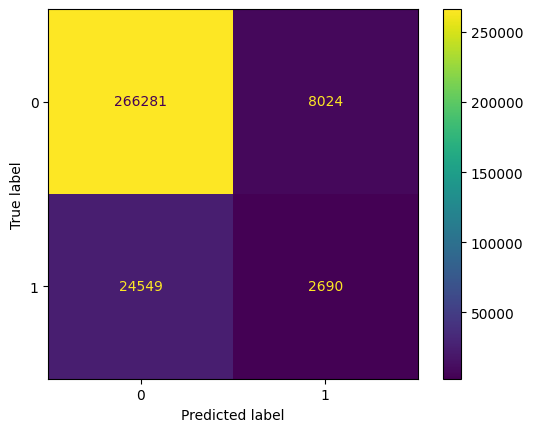

In [ ]:
acc = metrics.accuracy_score(yL, pred5) # Acuracia
prec = metrics.precision_score(yL, pred5) # Precisao
rec = metrics.recall_score(yL, pred5) # Recall
f1 = metrics.f1_score(yL, pred5) # f1- score
kappa = metrics.cohen_kappa_score(yL, pred5) # kappa

print('Acuracia:', acc)
print('Precisão:', prec)
print('Recall (Sensibilidade):',rec)
tn,fp,fn,tp = confusion_matrix(yL, pred5).ravel()
print('Especificidade: ', tn/ (tn+tp))
cm = ConfusionMatrixDisplay(confusion_matrix(yL, pred5))
cm.plot()
plt.show()

Testando os conjuntos de teste - Cross-Validation com Random Forest

In [ ]:
t = time.time()
rf = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True)

pred6 = cross_val_predict(rf, xL, yL, cv=kfold)
print('Tempo de execução: {}'.format(time.time() - t))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1068: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1068: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1068: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1068: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-p

Tempo de execução: 178.46576619148254


In [ ]:
acc = metrics.accuracy_score(yL, pred6) # Acuracia
prec = metrics.precision_score(yL, pred6) # Precisao
rec = metrics.recall_score(yL, pred6) # Recall
f1 = metrics.f1_score(yL, pred6) # f1- score
kappa = metrics.cohen_kappa_score(yL, pred6) # kappa

print('Acuracia:', acc)
print('Precisão:', prec)
print('Recall (Sensibilidade):',rec)
tn,fp,fn,tp = confusion_matrix(yL, pred6).ravel()
print('Especificidade: ', tn/ (tn+tp))
cm = ConfusionMatrixDisplay(confusion_matrix(yL, pred6))
cm.plot()
plt.show()

NameError: ignored